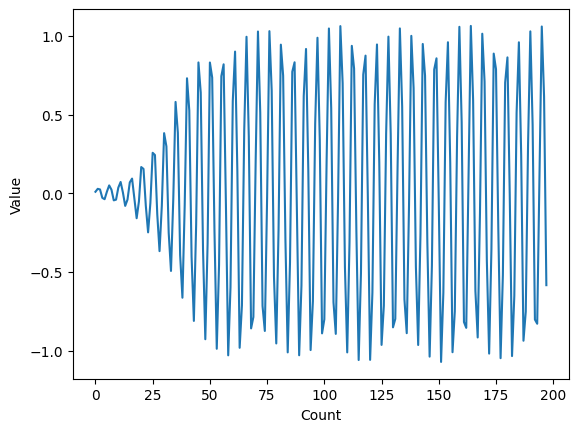

En büyük değer:  1.0620091038565487
En küçük değer: -1.0698233999890012 

The training was completed in 63 steps.
Train Error: 0.0009947152614253334
Test Error: 0.1788537211408049


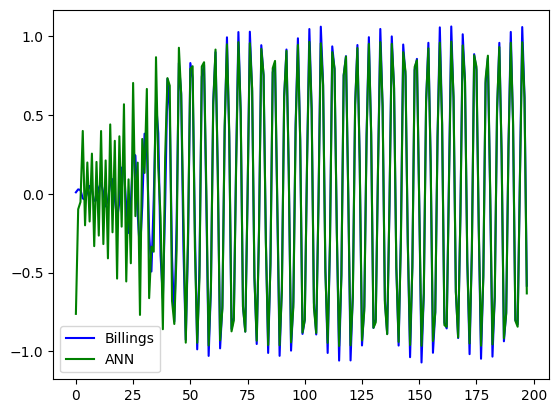

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random

# Aktivasyon fonksiyonları ve türevlerini tanımladık
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


def der_tanh(x):
    return 1 - tanh(x) * tanh(x)


def sigmoid(x):

    return 1/(1 + np.exp(-x))


def der_sigmoid(x):
    return np.exp(x)/((np.exp(x)+1)**2)

# Creating dataset with using equation
def create_dataset(size=200):
    y = np.zeros(size)
    noise = np.random.normal(0, 0.01, size)

    for k in range(2, size):
        y[k] = ((0.8 - 0.5 * np.exp(-1 * np.square(y[k - 1]))) * y[k - 1]
                - (0.3 + 0.9 * np.exp(-1 * np.square(y[k - 1]))) * y[k - 2]
                + (0.1 * np.sin(np.pi * y[k - 1]))
                + noise[k])
    return y

# Her çalıştırmada aynı rastgele değerleri elde etmek için Random.seed belirledik
numpy.random.seed(0)
# Veri setimizi oluşturduk ve train-test şeklinde böldük
data_size = 200  # Veri setimizin boyutunu belirledik
train_test_ratio = 0.8
train_size = int(data_size*train_test_ratio)
data = create_dataset(size=data_size)
train_data = data[:train_size]
test_data = data[train_size:]

#Elde ettiğimiz Veri setini çizdirdik
plt.plot(data[2:])
plt.xlabel("Count")
plt.ylabel("Value")
plt.show()
print(f"En büyük değer:  {max(data)}")
print(f"En küçük değer: { min(data)} \n")
#Veri setinin max ve min değerlerine bakarak tanh kullanmaya karar verdik.

# Elman ağımızdaki nöron sayılarını belirttik
input_dim = 2
gk_1 = 8
out = 1

# Rastgele ağırlıklar oluşturduk
weights_u = (np.random.rand(gk_1, input_dim) - 0.5) / 1
weights_x = (np.random.rand(gk_1, gk_1) - 0.5) / 1
weights_y = (np.random.rand(out, gk_1) - 0.5) / 1

# Eğitim döngüsü
Error = 0
n_learn = 0.25
threshold = 0.001
for j in range(1000):
    Error = 0
    # İlk İçerik katmanı oluşturup, ilk değerlerini 0 olarak verdik
    x_k_1 = np.zeros(gk_1)
    for i in range(2, len(train_data)):
        # İnput değerlerimizi belirledik
        step_data = [train_data[i - 2], train_data[i - 1]]

        # Gizli katmanın aktivasyon fonksiyonu çıkışlarını hesapladık
        vgk1_step = np.matmul(weights_u, step_data) + np.matmul(weights_x, x_k_1)
        xk = tanh(vgk1_step)
        # Çıkış katmanının aktivasyon fonksiyonu çıkışlarını hesapladık
        vy_step = np.matmul(weights_y, xk)
        yo = tanh(vy_step)
        # Adım hatası hesapladık
        step_error = yo - train_data[i]
        # Geri yayılım algoritması için gradyanları hesapladık
        grd_y = step_error * der_tanh(vy_step)
        grd_gk1 = np.matmul(np.transpose(weights_y), grd_y) * der_tanh(vgk1_step)

        # Hesaplanana gradyanlar ile ağırlıkları güncelledik
        weights_u_new = weights_u - n_learn * np.matmul(grd_gk1.reshape(-1, 1), np.transpose(np.array(step_data).reshape(2, 1)))
        weights_x_new = weights_x - n_learn * np.matmul(grd_gk1.reshape(-1, 1), np.transpose(x_k_1.reshape(-1, 1)))
        weights_y_new = weights_y - n_learn * np.matmul(grd_y.reshape(-1, 1), np.transpose(xk.reshape(-1, 1)))

        weights_u = weights_u_new
        weights_x = weights_x_new
        weights_y = weights_y_new

        # İçerik katmanına Gizli katman değerlerini attık
        x_k_1 = xk
        # Toplam hatayı güncelledik
        Error = Error + 0.5 * np.matmul(step_error, np.transpose(step_error))

    # Hesaplanan toplam hata eşik değerimizin altındaysa Eğitim tamamladık
    if Error / len(train_data) < threshold:
        print(f"The training was completed in {j} steps.")
        print(f"Train Error: {Error / len(train_data)}" )
        break

# Test döngüsü
# Burada ağırlık güncellemeden, eğitimde elde edilen ağırlıkalrı kullandık
Error = 0
for i in range(2, len(test_data)):
    step_data = [test_data[i - 2], test_data[i - 1]]

    vgk1_step = np.matmul(weights_u, step_data) + np.matmul(weights_x, x_k_1)
    xk = tanh(vgk1_step)

    vy_step = np.matmul(weights_y, xk)
    yo = tanh(vy_step)

    step_error = yo - train_data[i]

    x_k_1 = xk

    Error = Error + 0.5 * np.matmul(step_error, np.transpose(step_error))
print("Test Error:", Error / len(test_data))

# Son ağırlıklar ile yapılan tahminleri, orjinal veri ile kıyaslamak için bir listeye tutuyoruz
ann_data = []
for i in range(2, len(data)):
    step_data = [data[i-2], data[i-1]]

    vgk1_step = np.matmul(weights_u, step_data) + np.matmul(weights_x, x_k_1)
    xk = tanh(vgk1_step)

    vy_step = np.matmul(weights_y, xk)
    yo = tanh(vy_step)
    ann_data.append(yo)
    x_k_1 = xk

# Orjinal veri ile Tahminlenen verilerin karşılaştırılması
plt.plot(data[2:], "-b", label="Billings")
plt.plot(ann_data, "-g", label="ANN")
plt.legend()
plt.show()
